# **Practical Exam Project – Applied Machine Learning & Statistics**

**Group Members:**

*   Simran Amesar
*   Shreya Chowdary Challagulla
*   Ishwari Thakur
*   Pooja Chandrappa
*   Yuvraj Ghag


1.   Dataset Selection
2.   Preprocessing - Simran
3.   Noise Injection & Cleaning - Pooja
4.   Statistical Analysis - Ishwari
5.   Supervised Learning - Shreya
6.   Unsupervised Learning - Yuvraj
7.   Creativity & Justification


dataset link: https://archive.ics.uci.edu/dataset/360/air+quality

## **Air Quality Dataset**

#### **Selected Dataset**

Dataset name: **Air Quality Data Set**
DOI: **10.24432/C5MW2G**

#### **Source**

The dataset was obtained from the UCI Machine Learning Repository, originally collected by the Italian National Agency for New Technologies, Energy and Sustainable Economic Development (ENEA). It contains sensor readings from an air quality monitoring station located in an urban area of Italy.

#### **Size**

Number of instances: **9,358 hourly observations**

Number of features: **15 variables**

#### **Features**

The dataset includes measurements from chemical sensors and meteorological variables, such as:

Carbon Monoxide (CO)

Nitrogen Oxides (NOx)

Nitrogen Dioxide (NO2)

Ozone sensor responses


In [ ]:
pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**Import the dataset**

In [ ]:
air_quality = fetch_ucirepo(id=360)
df = air_quality.data.features.copy()
df_time = air_quality.data.features.copy()
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB
None


In [ ]:
print(f"Dataset loaded. Shape: {df.shape}")
print("Columns:", df.columns.tolist())

Dataset loaded. Shape: (9357, 15)
Columns: ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


# **Preprocessing**

**Handling Missing Values**

In [ ]:
df.replace(-200, np.nan, inplace=True)

Several features contain missing values, originally coded as -200. These values were treated as missing data and replaced with NaN.


In [ ]:
print("Missing values per column:\n")
print(df.isnull().sum())

Missing values per column:

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


In [ ]:
print("\nMissing values before imputation:",int(df.isna().sum().sum()))

num_cols_all = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols_all = df.select_dtypes(exclude=["int64", "float64"]).columns
num_cols = df[num_cols_all].columns

print("\nNumeric columns:")
print(list(num_cols_all))

print("\nCategorical columns:")
print(list(cat_cols_all))


Missing values before imputation: 16701

Numeric columns:
['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

Categorical columns:
['Date', 'Time']


In [ ]:
num_medians = df[num_cols_all].median()
df[num_cols_all] = df[num_cols_all].fillna(num_medians)
print("\nMissing values after imputation:",int(df.isna().sum().sum()))


Missing values after imputation: 0


Numeric Data had missing values which have been replaced with the median.
Median imputation  has been done as it is robust to pollutant skewness <br>
Categorical Data has no missing values.

In [ ]:
df['DateTime'] = pd.to_datetime(df[['Date', 'Time']].astype(str).agg(' '.join, axis=1))
df.set_index('DateTime', inplace=True)
df.drop(['Date', 'Time'], axis=1, inplace=True)
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


The columns Time and Date has been converted into one column DateTime

In [ ]:
target_col = 'CO(GT)'
X = df.drop(columns=[target_col])
y = df[[target_col]]

print(f"Features shape: {X.shape}, Target shape: {y.shape}")

Features shape: (9357, 12), Target shape: (9357, 1)


Target column has been selected as 'CO(GT)'

**No encoding needed as Date/Time handled separately, and no other categoricals**

##**Noise Injection and Cleaning**

In [ ]:
target_col = "CO(GT)"
noise_cols = ["PT08.S1(CO)", "PT08.S2(NMHC)"]

In [ ]:
df_base = df.copy()
df_noisy = df_base.copy()

rng = np.random.default_rng(42)


In [ ]:
gauss_strength = 0.15
for col in noise_cols:
    sigma = df_noisy[col].std()
    df_noisy[col] = df_noisy[col] + rng.normal(0, gauss_strength * sigma, size=len(df_noisy))

# Outliers: spike 1% of rows
outlier_frac = 0.01
outlier_mult = 3.0
n_out = max(1, int(len(df_noisy) * outlier_frac))
out_idx = rng.choice(df_noisy.index, size=n_out, replace=False)

for col in noise_cols:
    df_noisy.loc[out_idx, col] = df_noisy.loc[out_idx, col] * outlier_mult

In [ ]:
# Noise cleaning (smoothing + optional clipping)
df_denoised = df_noisy.copy()

# Smoothing: rolling median (robust) or rolling mean (smoother)
window = 5
for col in noise_cols:
    df_denoised[col] = df_denoised[col].rolling(window=window, center=True).median()

# Fix NaNs at the edges created by rolling
for col in noise_cols:
    df_denoised[col] = df_denoised[col].bfill().ffill()

In [ ]:
# OPTIONAL (recommended): clip extreme values using IQR after smoothing
def iqr_clip(series, k=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lo = q1 - k * iqr
    hi = q3 + k * iqr
    return series.clip(lo, hi)

for col in noise_cols:
    df_denoised[col] = iqr_clip(df_denoised[col], k=1.5)

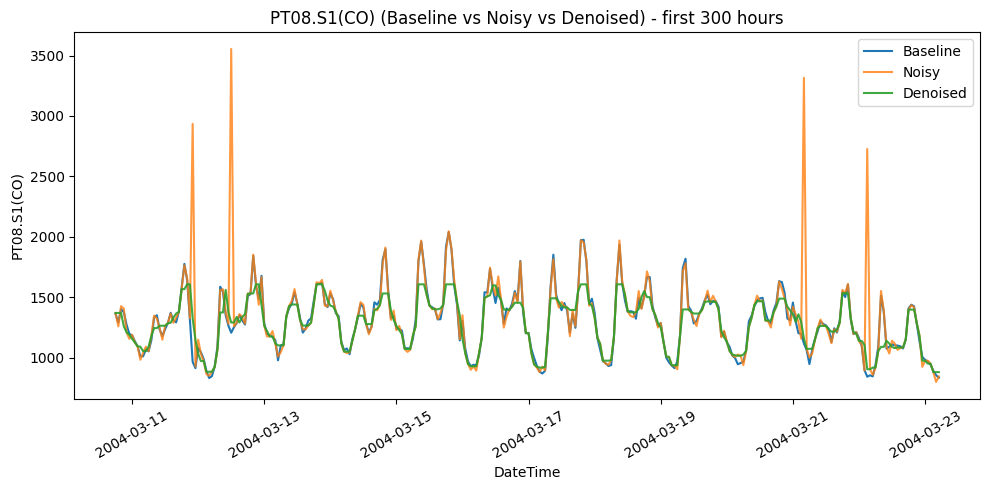

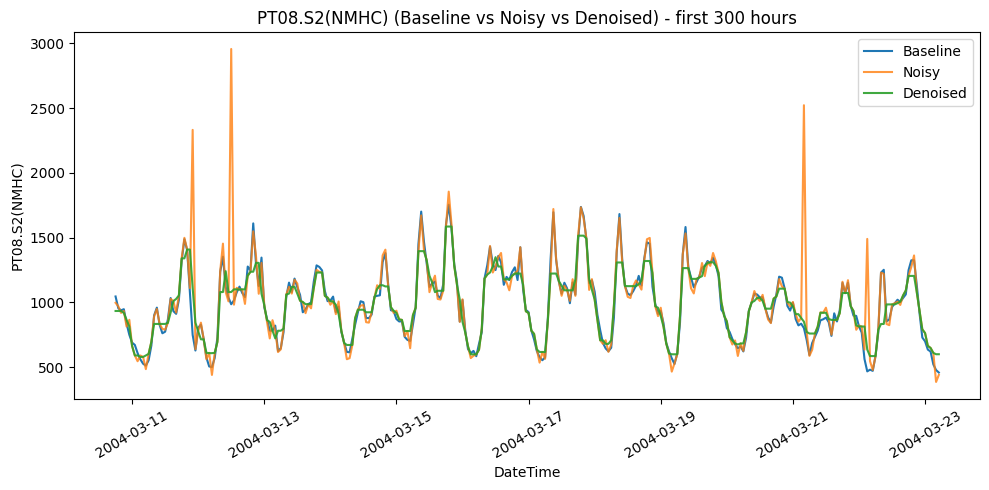

In [ ]:
for col_plot in noise_cols:
    plt.figure(figsize=(10,5))
    plt.plot(df_base.index[:300], df_base[col_plot].iloc[:300], label="Baseline")
    plt.plot(df_noisy.index[:300], df_noisy[col_plot].iloc[:300], label="Noisy", alpha=0.8)
    plt.plot(df_denoised.index[:300], df_denoised[col_plot].iloc[:300], label="Denoised", alpha=0.9)

    plt.title(f"{col_plot} (Baseline vs Noisy vs Denoised) - first 300 hours")
    plt.xlabel("DateTime")
    plt.ylabel(col_plot)
    plt.legend()
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

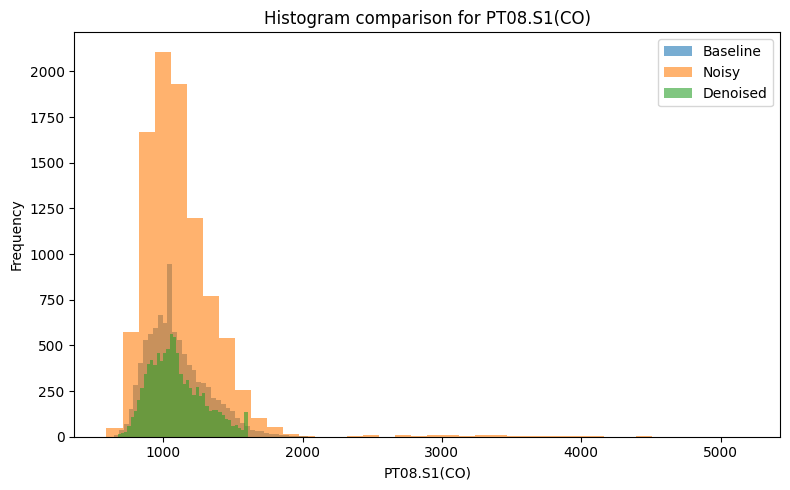

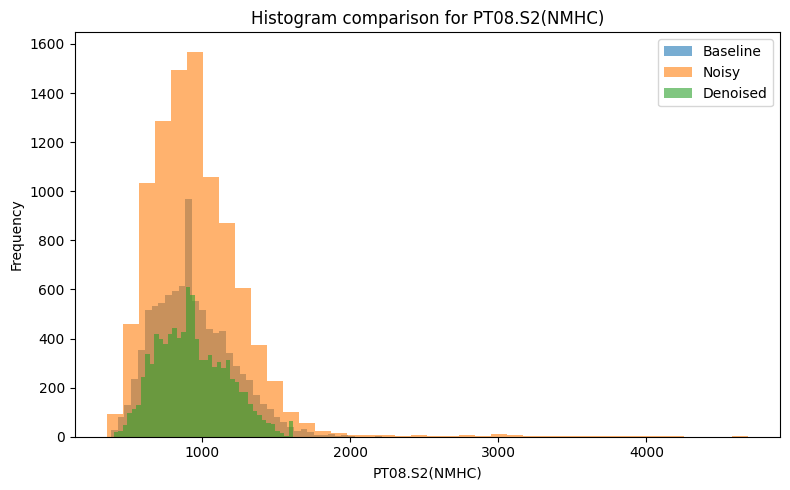

In [ ]:
for col_plot in noise_cols:
    plt.figure(figsize=(8,5))
    plt.hist(df_base[col_plot], bins=40, alpha=0.6, label="Baseline")
    plt.hist(df_noisy[col_plot], bins=40, alpha=0.6, label="Noisy")
    plt.hist(df_denoised[col_plot], bins=40, alpha=0.6, label="Denoised")

    plt.title(f"Histogram comparison for {col_plot}")
    plt.xlabel(col_plot)
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-1472323616.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


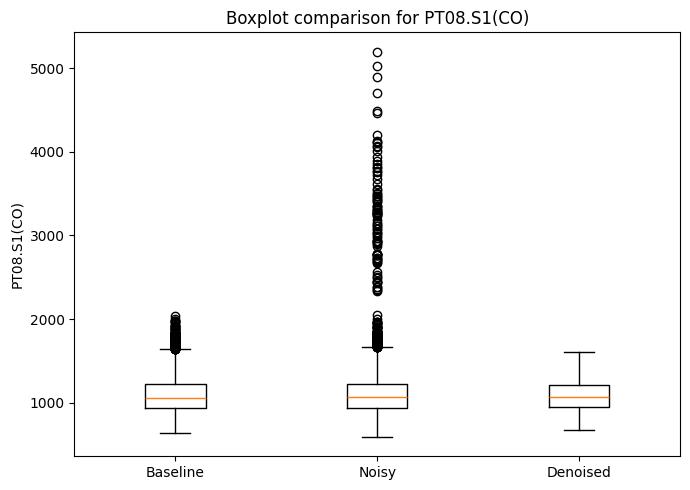

/tmp/ipython-input-1472323616.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


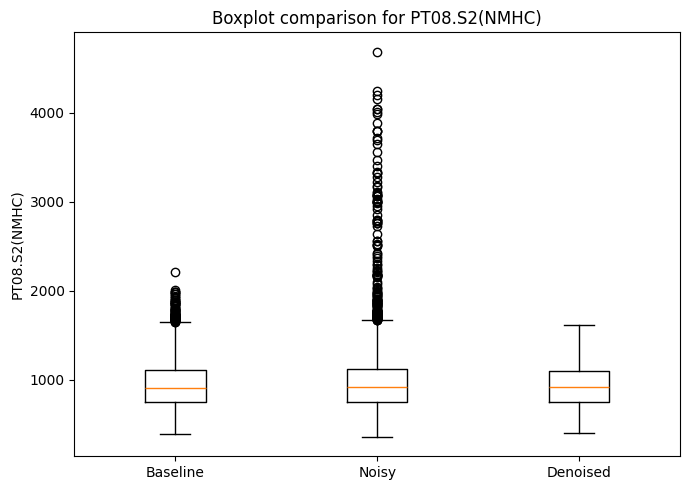

In [ ]:
for col_plot in noise_cols:
    plt.figure(figsize=(7,5))
    plt.boxplot(
        [df_base[col_plot].values, df_noisy[col_plot].values, df_denoised[col_plot].values],
        labels=["Baseline", "Noisy", "Denoised"],
        showfliers=True
    )
    plt.title(f"Boxplot comparison for {col_plot}")
    plt.ylabel(col_plot)
    plt.tight_layout()
    plt.show()

In [ ]:
outlier_summary = {}

for col in df_denoised.select_dtypes(include=[np.number]).columns:
    Q1 = df_denoised[col].quantile(0.25)
    Q3 = df_denoised[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_denoised[(df_denoised[col] < lower_bound) | (df_denoised[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient="index", columns=["Outlier_Count"])
outlier_df = outlier_df.sort_values(by="Outlier_Count", ascending=False)

print(outlier_df)

               Outlier_Count
NMHC(GT)                 909
NOx(GT)                  778
CO(GT)                   454
NO2(GT)                  380
C6H6(GT)                 286
PT08.S3(NOx)             278
PT08.S4(NO2)             131
PT08.S5(O3)              131
T                         10
AH                         7
PT08.S1(CO)                0
PT08.S2(NMHC)              0
RH                         0


In [ ]:
import numpy as np
import pandas as pd

df_reg = df_denoised.copy()

target_col = "CO(GT)"

# Apply clipping only to FEATURES (not the target)
feature_cols = df_reg.columns.drop(target_col)

def iqr_clip(series, k=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - k * IQR
    upper = Q3 + k * IQR
    return series.clip(lower, upper)

# Clip outliers in all feature columns
for col in feature_cols:
    df_reg[col] = iqr_clip(df_reg[col], k=1.5)

print("Outlier clipping applied to all feature columns (target unchanged).")
print("Dataset ready for Linear Regression:", df_reg.shape)

Outlier clipping applied to all feature columns (target unchanged).
Dataset ready for Linear Regression: (9357, 13)


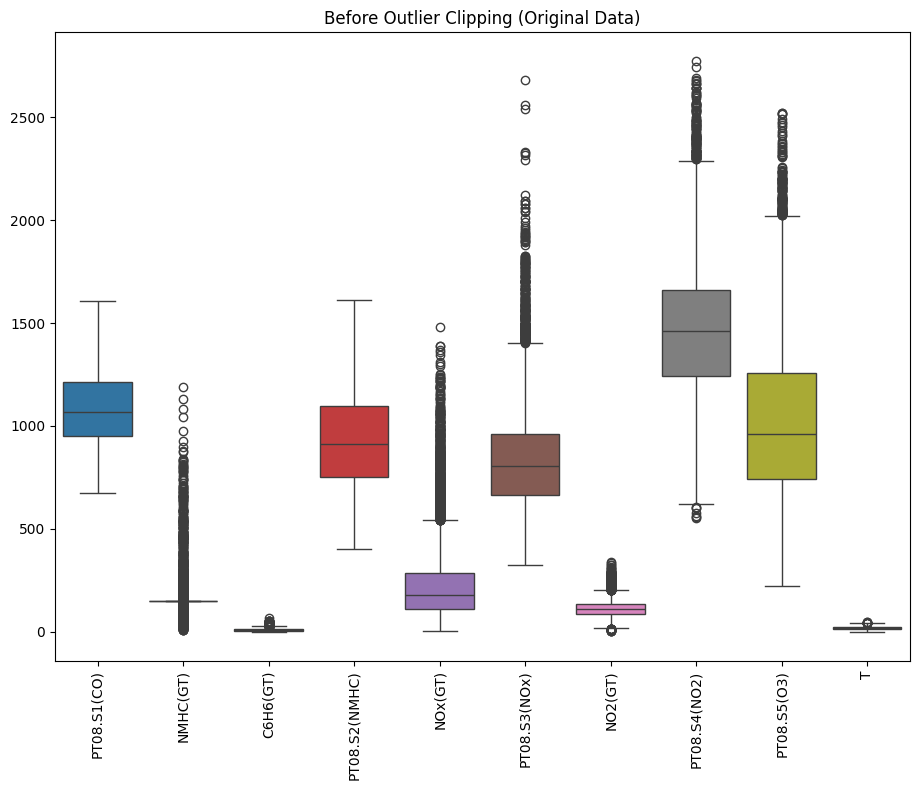

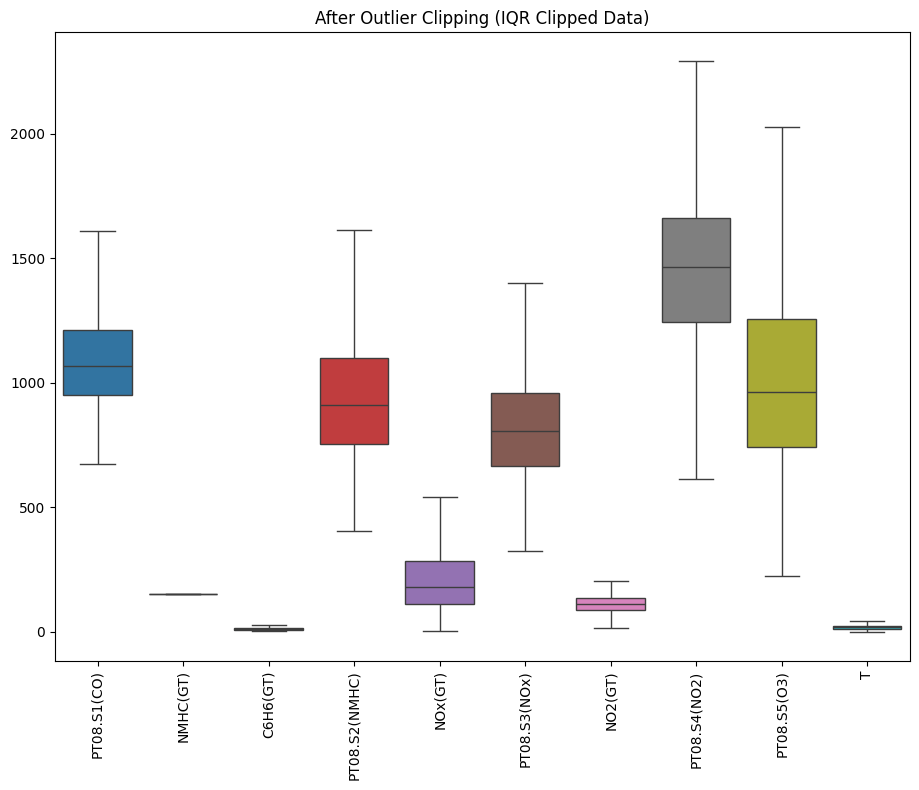

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copy original dataset BEFORE clipping (for comparison)
df_before = df_denoised.copy()

# Dataset AFTER clipping (your df_reg already clipped)
df_after = df_reg.copy()

# Choose a few important feature columns to visualize (avoid plotting all at once)
cols_to_plot = feature_cols[:10]   # first 10 features (you can change this)


def plotting(num1,num2,num3, dataset,title ):
  plt.figure(figsize=(18, 8))
  plt.subplot(num1, num2, num3)
  sns.boxplot(data = dataset[cols_to_plot])
  plt.title(title)
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()
  return

before = plotting(1,2,1,df_before,"Before Outlier Clipping (Original Data)")
after = plotting(1,2,2,df_after,"After Outlier Clipping (IQR Clipped Data)")

# Statistical Analysis

In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

numerical_cols = df_denoised.select_dtypes(include=[np.number]).columns.tolist()

data = df_reg.copy()

numeric_cols = data.select_dtypes(include=[np.number]).columns

stats_df = pd.DataFrame({
    "Mean": data[numeric_cols].mean(),
    "Variance": data[numeric_cols].var(),
    "Skewness": data[numeric_cols].skew(),
    "Min": data[numeric_cols].min(),
    "Max": data[numeric_cols].max()
})

stats_df = stats_df.sort_values(by="Skewness", ascending=False)

print("=== Descriptive Statistics ===")
print(stats_df)

=== Descriptive Statistics ===
                      Mean       Variance  Skewness         Min          Max
CO(GT)            2.089302       1.750393  1.629331    0.100000    11.900000
NOx(GT)         218.581383   21675.540538  0.966231    2.000000   542.000000
C6H6(GT)          9.826718      45.103865  0.914218    0.100000    27.100000
PT08.S1(CO)    1092.391291   36857.657718  0.580602  672.372467  1606.737950
PT08.S5(O3)    1018.396655  147773.182831  0.557763  221.000000  2024.500000
PT08.S3(NOx)    827.805921   53140.108759  0.516365  322.000000  1401.000000
PT08.S2(NMHC)   931.470350   55170.987196  0.372940  402.079914  1614.646391
NO2(GT)         111.320295    1679.638315  0.328541   15.500000   203.500000
T                18.296601      74.916807  0.320442   -1.900000    42.250000
AH                1.024318       0.156645  0.263664    0.184700     2.121350
PT08.S4(NO2)   1454.463183  111129.696512  0.082336  612.000000  2292.000000
NMHC(GT)        150.000000       0.000000  0.

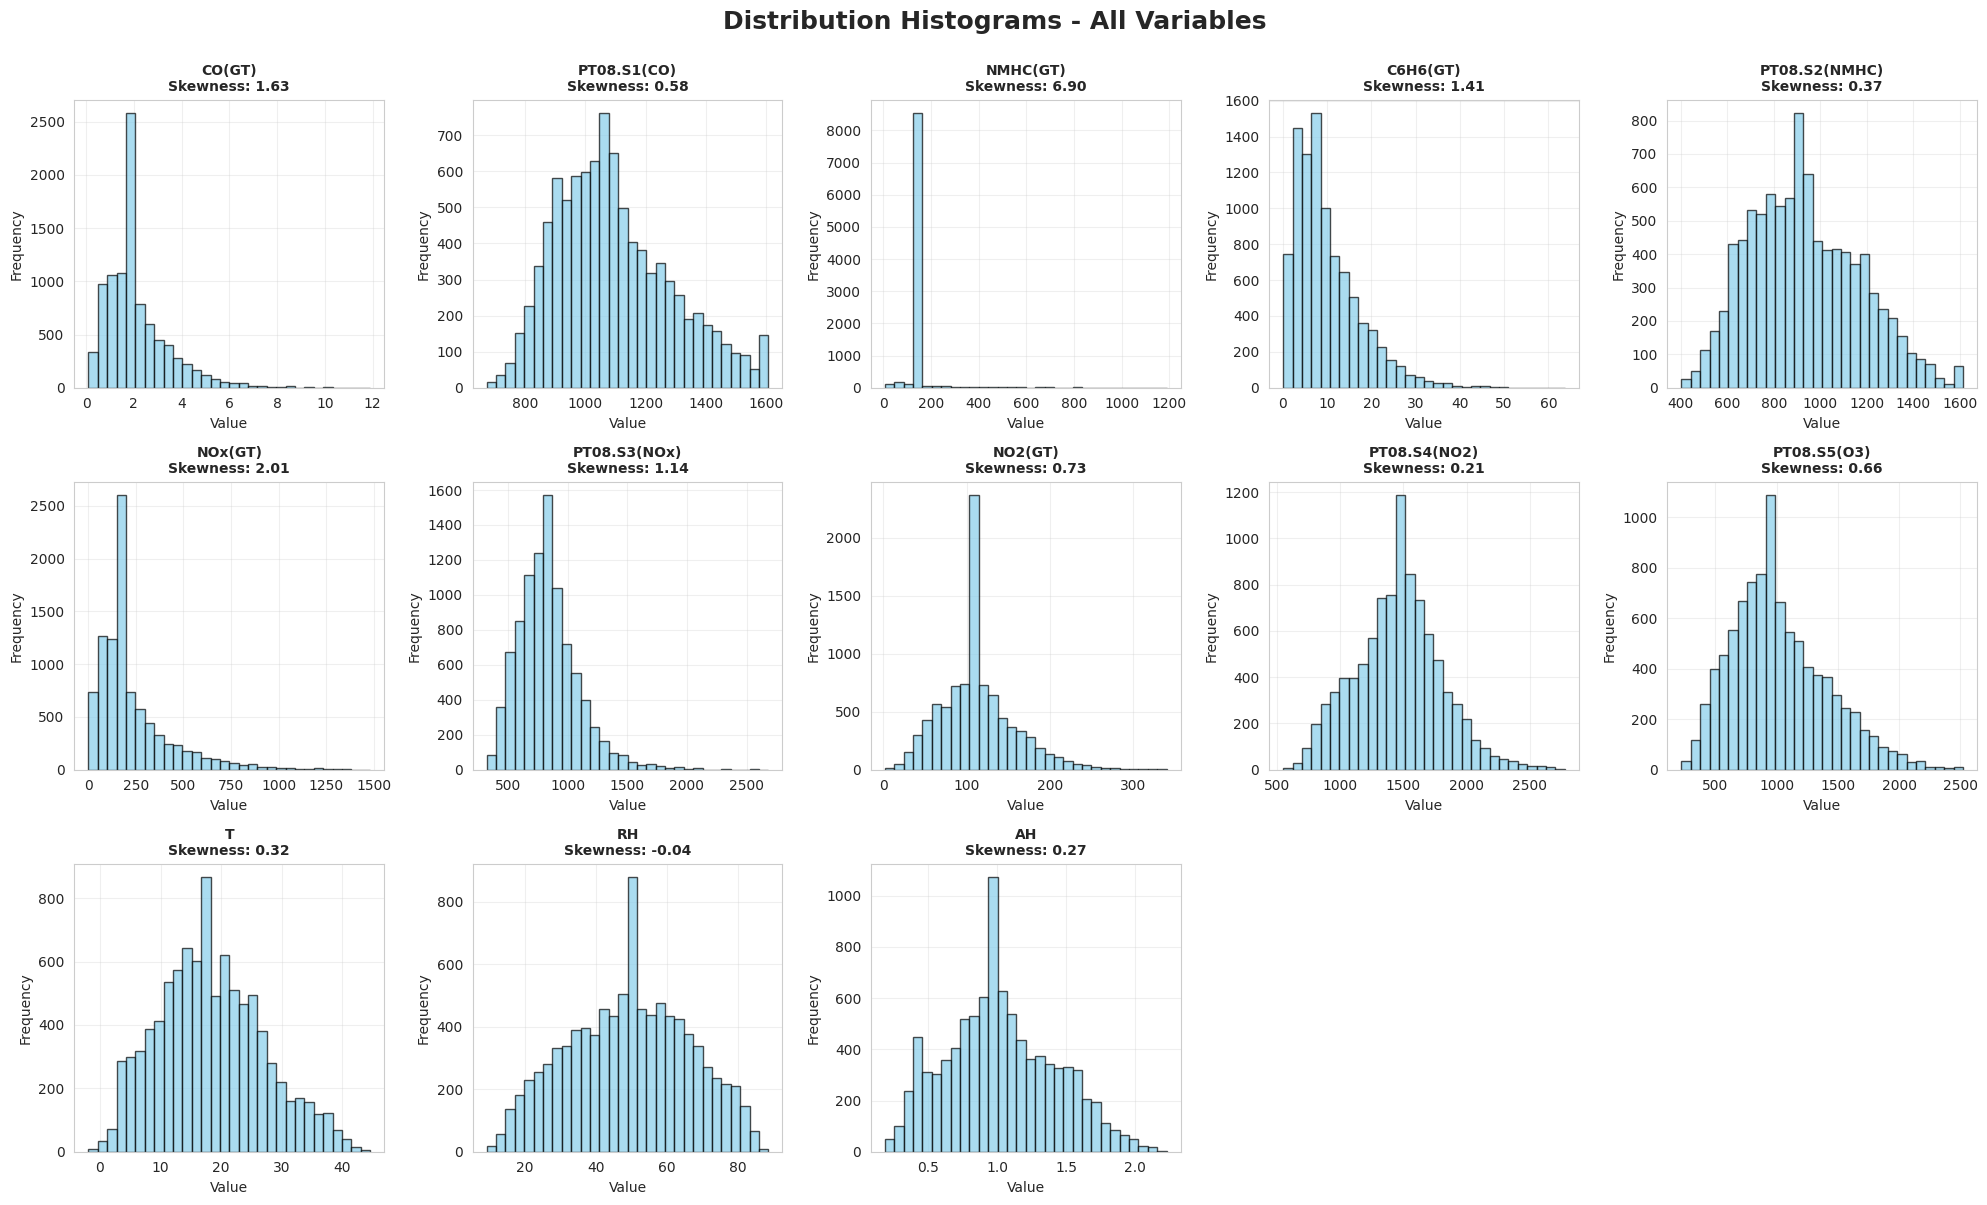

In [ ]:
#histogram
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        axes[idx].hist(df_denoised[col].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{col}\nSkewness: {df_denoised[col].skew():.2f}', fontsize=10, fontweight='bold')
        axes[idx].set_xlabel('Value')
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(True, alpha=0.3)

# Hide any unused subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Distribution Histograms - All Variables', fontsize=18, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

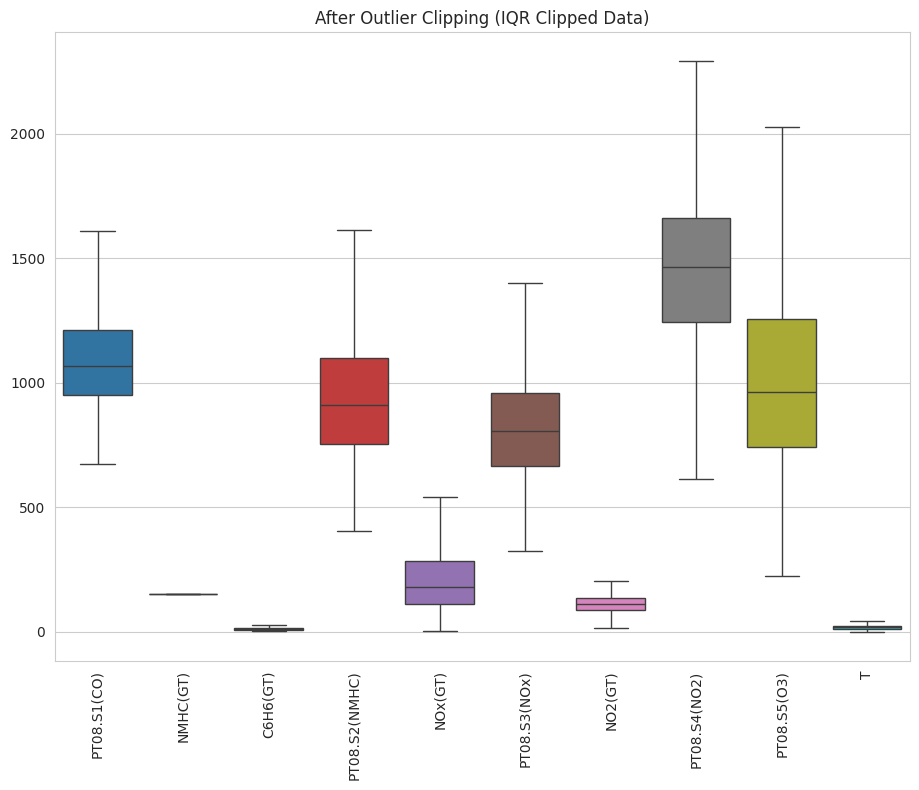

In [ ]:
# Dataset AFTER clipping (your df_reg already clipped)
df_after = df_reg.copy()

# Choose a few important feature columns to visualize (avoid plotting all at once)
cols_to_plot = feature_cols[:10]   # first 10 features (you can change this)

plt.figure(figsize=(18, 8))

# AFTER clipping
plt.subplot(1, 2, 2)
sns.boxplot(data=df_after[cols_to_plot])
plt.title("After Outlier Clipping (IQR Clipped Data)")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

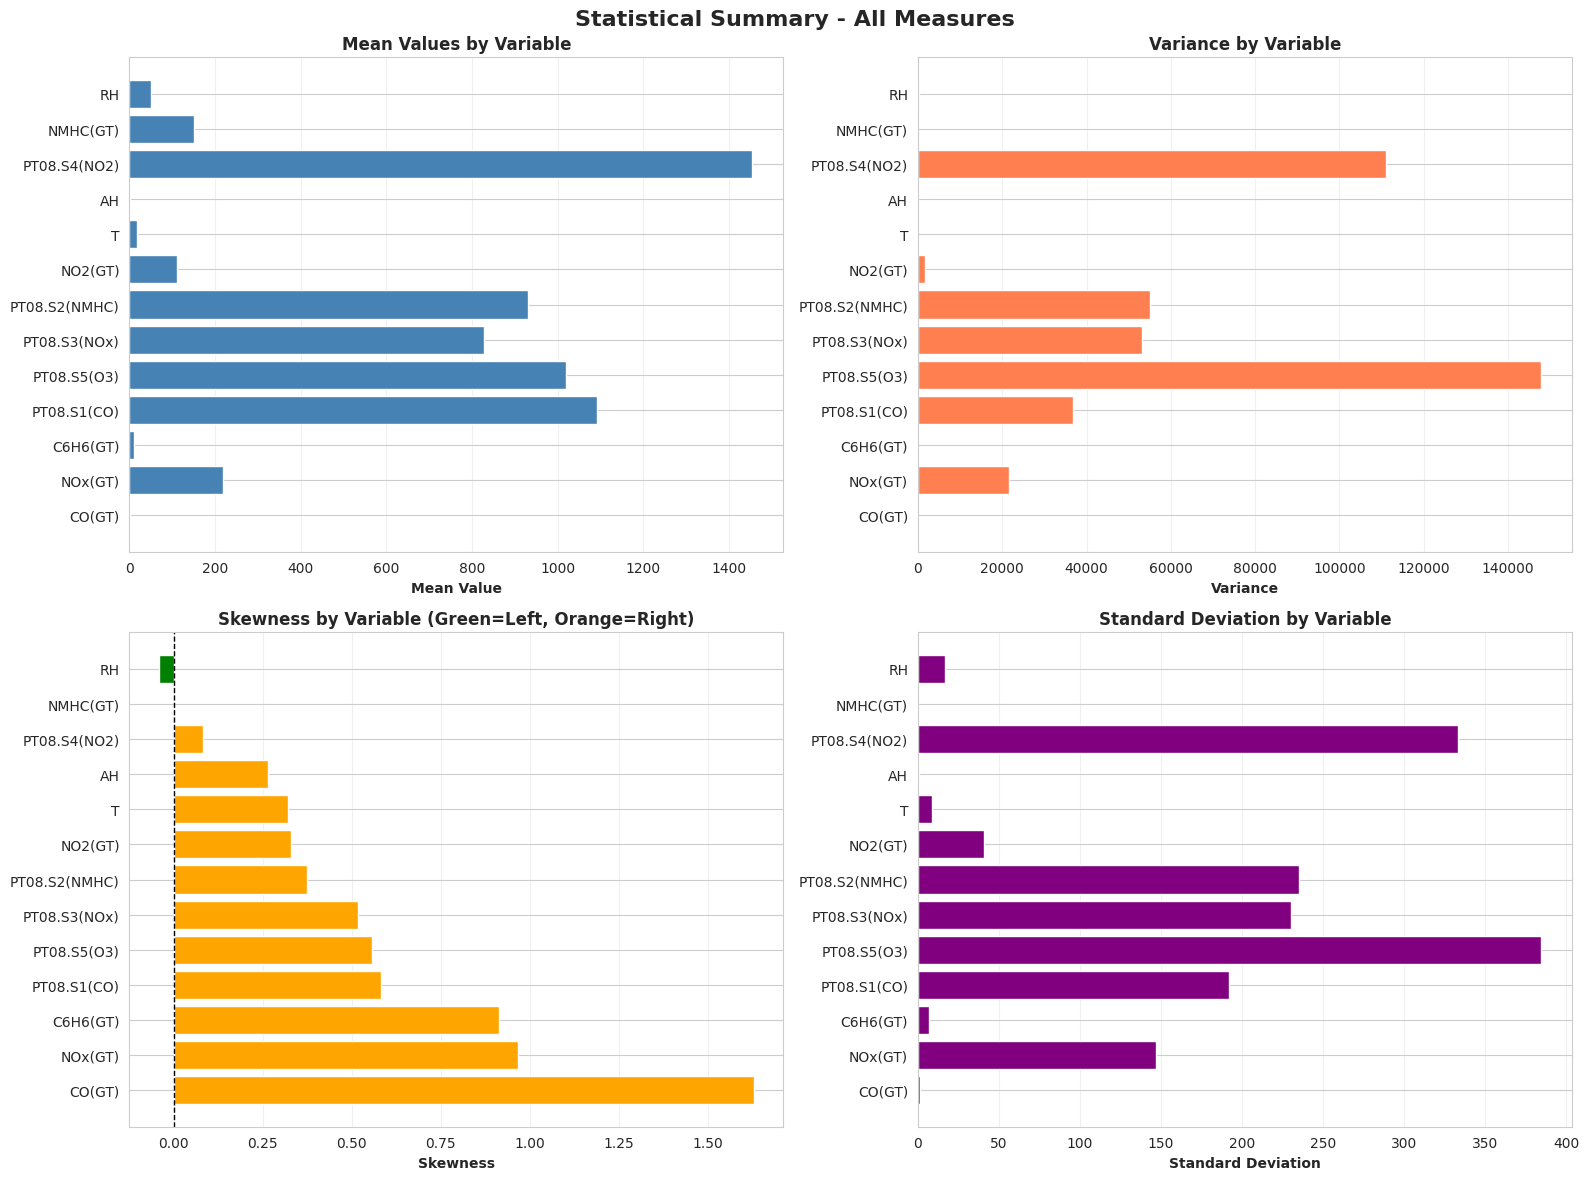

In [ ]:
#Statistical Summary Visualization
stats_df["Std_Dev"] = np.sqrt(stats_df["Variance"])

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot: Mean values
axes[0, 0].barh(stats_df.index, stats_df['Mean'], color='steelblue')
axes[0, 0].set_xlabel('Mean Value', fontweight='bold')
axes[0, 0].set_title('Mean Values by Variable', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Plot: Variance
axes[0, 1].barh(stats_df.index, stats_df['Variance'], color='coral')
axes[0, 1].set_xlabel('Variance', fontweight='bold')
axes[0, 1].set_title('Variance by Variable', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Plot: Skewness
colors = ['green' if x < 0 else 'orange' if x > 0 else 'gray' for x in stats_df['Skewness']]
axes[1, 0].barh(stats_df.index, stats_df['Skewness'], color=colors)
axes[1, 0].set_xlabel('Skewness', fontweight='bold')
axes[1, 0].set_title('Skewness by Variable (Green=Left, Orange=Right)', fontweight='bold')
axes[1, 0].axvline(x=0, color='black', linestyle='--', linewidth=1)
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Plot: Standard Deviation
axes[1, 1].barh(stats_df.index, stats_df['Std_Dev'], color='purple')
axes[1, 1].set_xlabel('Standard Deviation', fontweight='bold')
axes[1, 1].set_title('Standard Deviation by Variable', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.suptitle('Statistical Summary - All Measures', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
print(f"\nTotal variables analyzed: {len(numerical_cols)}")
print(f"Total observations: {len(df_denoised)}")
print(f"\nKey Findings:")
print(f"• Most right-skewed variable: {stats_df['Skewness'].idxmax()} (skewness: {stats_df['Skewness'].max():.2f})")
print(f"• Most left-skewed variable: {stats_df['Skewness'].idxmin()} (skewness: {stats_df['Skewness'].min():.2f})")
print(f"• Highest variance: {stats_df['Variance'].idxmax()} (variance: {stats_df['Variance'].max():.2f})")
# print(f"• Strongest positive correlation: {correlation_df.iloc[0]['Variable 1']} & {correlation_df.iloc[0]['Variable 2']} (r = {correlation_df.iloc[0]['Correlation']:.3f})")


Total variables analyzed: 13
Total observations: 9357

Key Findings:
• Most right-skewed variable: CO(GT) (skewness: 1.63)
• Most left-skewed variable: RH (skewness: -0.04)
• Highest variance: PT08.S5(O3) (variance: 147773.18)


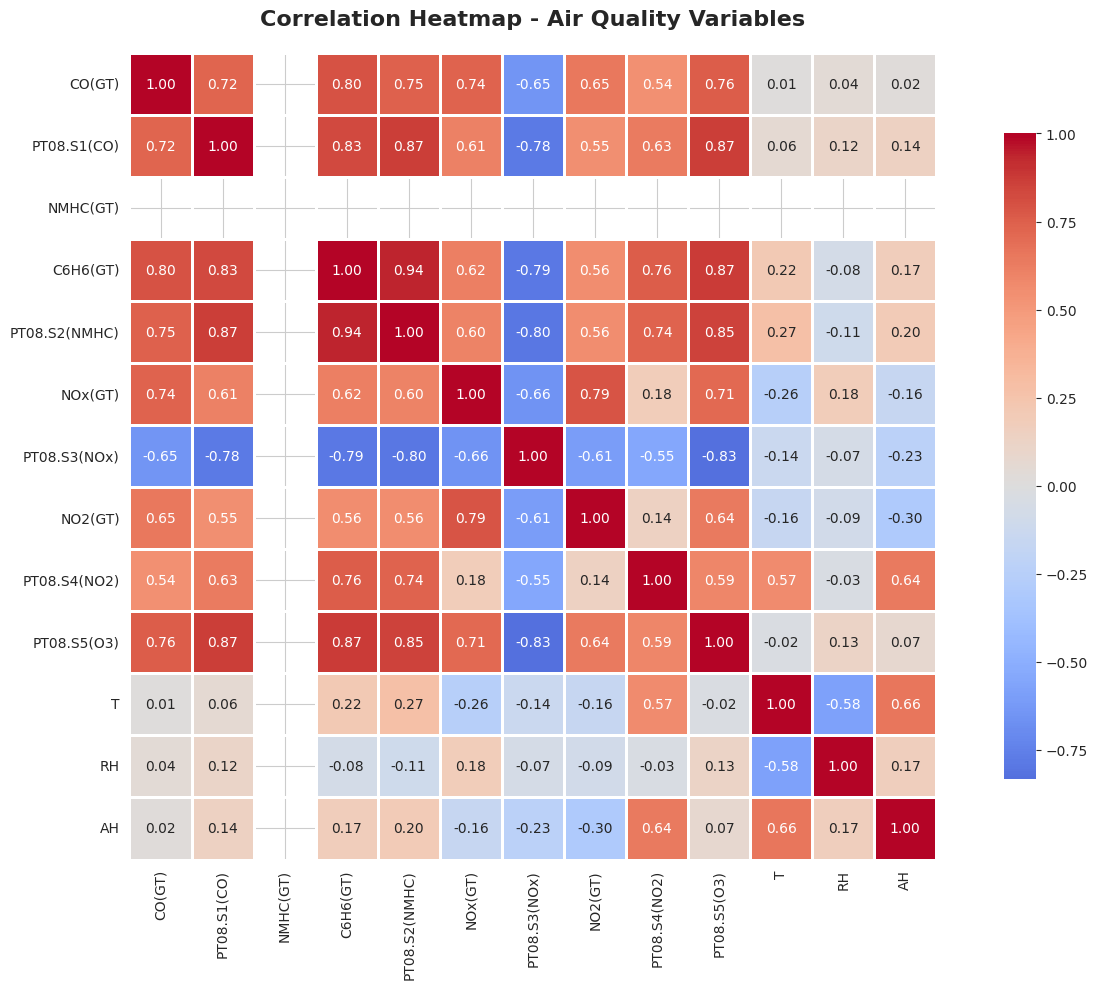

In [ ]:
#heatmap

correlation_matrix = data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Air Quality Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# **Supervised Learning** <br>
***Linear Regression Model***

The target column is "CO(GT)" which is the Carbon Monoxide present in the air.By using Linear Regression model we predict the output CO(GT) and visualized the results on the plot. According to the heatmap we considered 6 features which are highly correlated with the output feature "CO(GT)". NMHC(GT) feature was dropped as it was constant and had no effect on predicting the output.




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

target_col = "CO(GT)"

df_model = df_reg.drop(columns=["NMHC(GT)"], errors="ignore").copy()

# Selected features from the above heat map
feature_cols = [
    "PT08.S1(CO)", "C6H6(GT)", "PT08.S2(NMHC)",
    "NOx(GT)", "PT08.S5(O3)"
]
print("Selected features:", feature_cols)


Selected features: ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S5(O3)']


The data is split into test and train.80% of the data is considered as training data and 20% of the data is considered as testing data.

In [ ]:
feature_cols = [c for c in feature_cols if c in df_model.columns]

X = df_model[feature_cols]
y = df_model[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

The input data was scaled using standard scaler before passing it to the linear regression model

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train_scaled.shape, "Test shape:", X_test_scaled.shape)

Train shape: (7485, 5) Test shape: (1872, 5)


The training data is given to the linear regression model and RMSE, MAE and R2 score is calculated.1

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=200, n_jobs=-1)
}

results = []
preds_dict = {}

for name, model in models.items():


    if name == "Linear Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)


    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    preds_dict[name] = y_pred

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append([name, rmse, mae, r2])

results_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R2"]).sort_values("RMSE")
print(results_df.to_string(index=False))


            Model     RMSE      MAE       R2
    Random Forest 0.655281 0.435162 0.760967
Linear Regression 0.726689 0.520099 0.706032


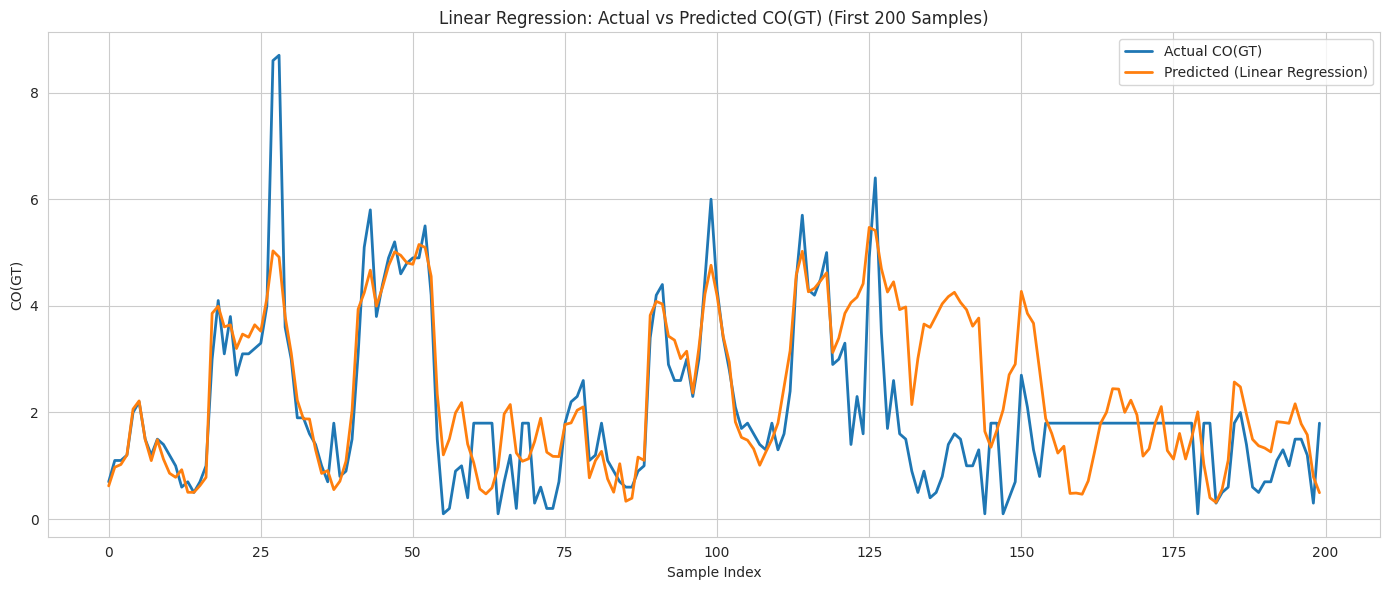

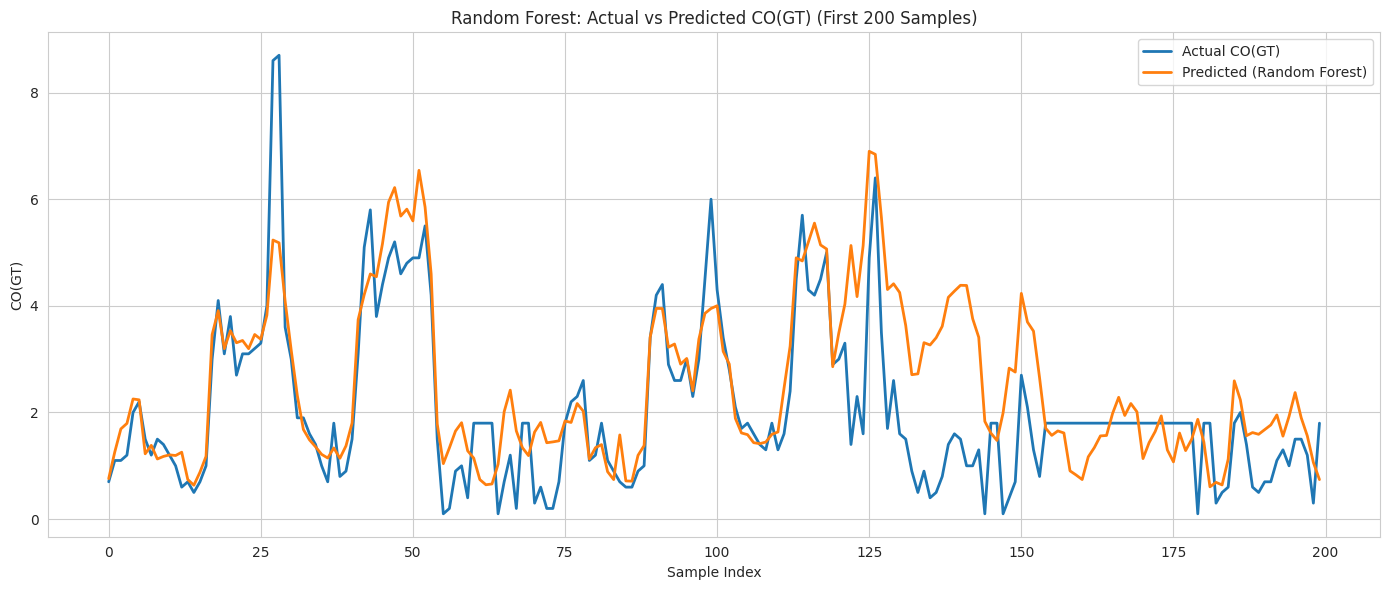

In [ ]:
for model_name, preds in preds_dict.items():
    plt.figure(figsize=(14,6))
    plt.plot(y_test.values[:200], linewidth=2, label="Actual CO(GT)")
    plt.plot(preds[:200], linewidth=2, label=f"Predicted ({model_name})")

    plt.title(f"{model_name}: Actual vs Predicted CO(GT) (First 200 Samples)")
    plt.xlabel("Sample Index")
    plt.ylabel("CO(GT)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score



cluster_features = [
    "PT08.S1(CO)",
    "C6H6(GT)",
    "NOx(GT)",
    "NO2(GT)",
    "PT08.S4(NO2)",
    "PT08.S5(O3)",
    "T",
    "RH",
    "AH"
]

cluster_features = [c for c in cluster_features if c in df_model.columns]

print("Clustering features used:", cluster_features)



X_cluster = df_model[cluster_features].copy()


X_cluster = X_cluster.fillna(X_cluster.median(numeric_only=True))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

print("Scaled shape:", X_scaled.shape)

Clustering features used: ['PT08.S1(CO)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
Scaled shape: (9357, 9)


# **Unsupervised**

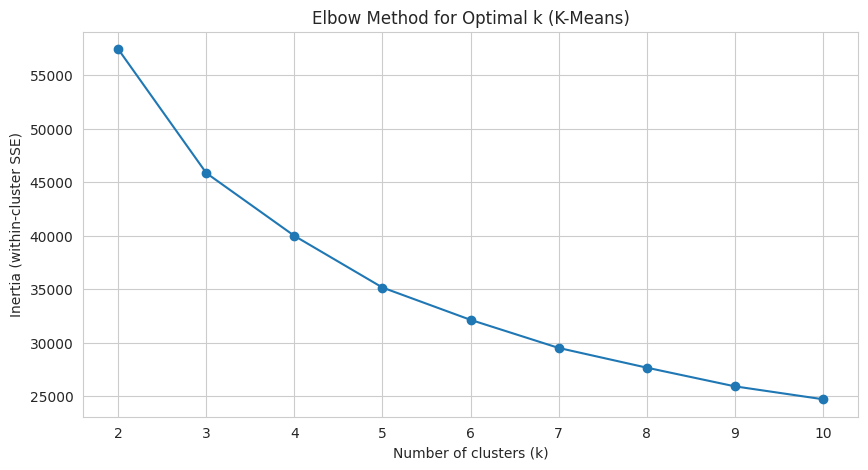

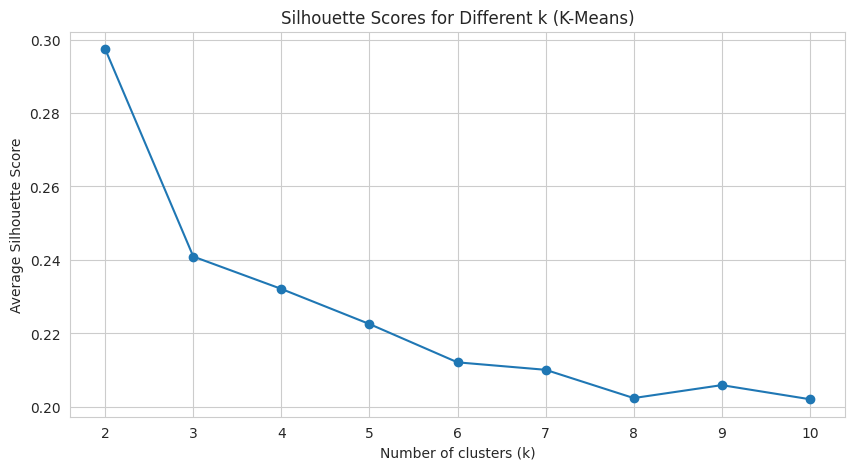

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = range(2, 11)
inertias = []
sil_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    inertias.append(kmeans.inertia_)

    if len(set(labels)) > 1:
        sil_scores.append(silhouette_score(X_scaled, labels))
    else:
        sil_scores.append(np.nan)

plt.figure(figsize=(10, 5))
plt.plot(list(k_values), inertias, marker='o')
plt.xticks(list(k_values))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (within-cluster SSE)")
plt.title("Elbow Method for Optimal k (K-Means)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(k_values), sil_scores, marker='o')
plt.xticks(list(k_values))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Average Silhouette Score")
plt.title("Silhouette Scores for Different k (K-Means)")
plt.grid(True)
plt.show()

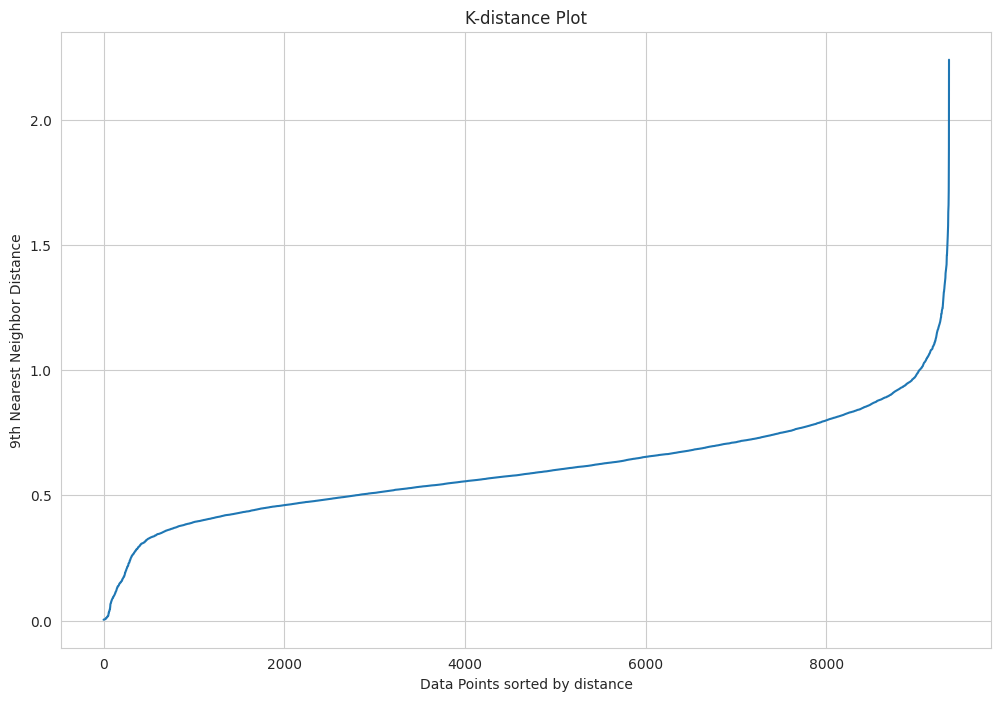

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=18)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)


distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.title("K-distance Plot")
plt.xlabel("Data Points sorted by distance")
plt.ylabel("9th Nearest Neighbor Distance")
plt.grid(True)
plt.show()



K-Means Cluster Counts:
Cluster
1    6101
0    3256
Name: count, dtype: int64


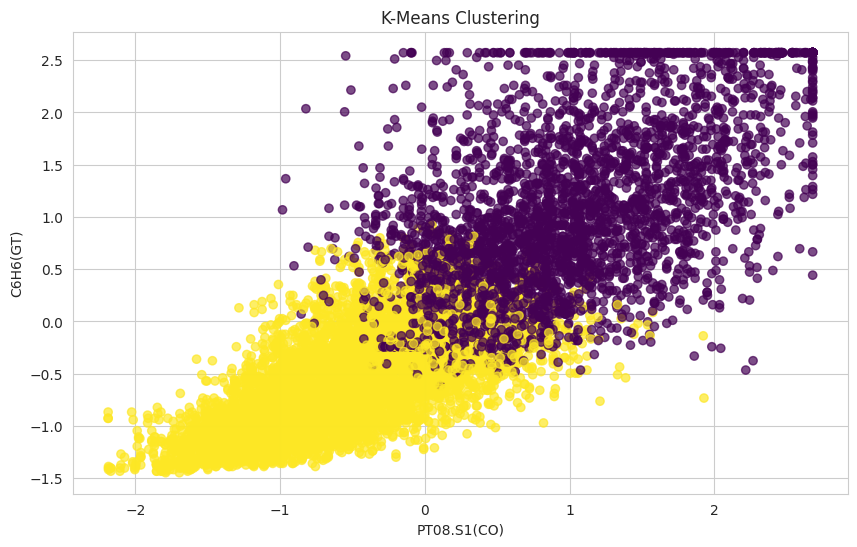

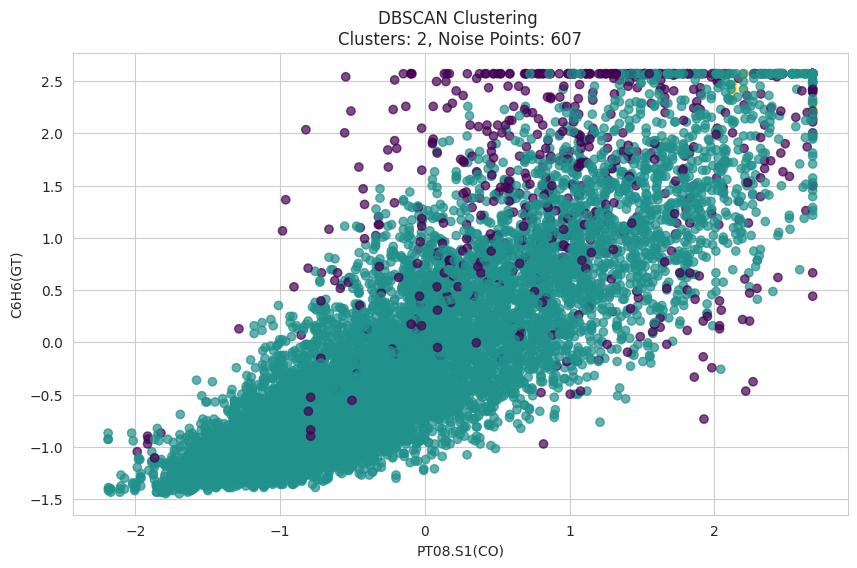

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns = cluster_features )


unsupervised_models = {
    "K-Means": KMeans(n_clusters=2, random_state=42),
    "DBSCAN": DBSCAN(eps=1.0, min_samples=18),
}

for model_name, model in unsupervised_models.items():

    if model_name == "DBSCAN":
      labels = model.fit_predict(X_scaled)
      n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
      n_noise = list(labels).count(-1)
      title_text = f"{model_name} Clustering \nClusters: {n_clusters}, Noise Points: {n_noise}"

      plt.figure(figsize=(10,6))
      plt.scatter(
            X_scaled.iloc[:, 0],
            X_scaled.iloc[:, 1],
            c=labels,
            cmap='viridis',
            alpha=0.7
        )
      plt.xlabel(X_scaled.columns[0])
      plt.ylabel(X_scaled.columns[1])
      plt.title( f"{model_name} Clustering \nClusters: {n_clusters}, Noise Points: {n_noise}")
      plt.grid(True)
      plt.show()


    else:
        labels = model.fit_predict(X_scaled)
        X_clustered = X_scaled.copy()
        X_clustered["Cluster"] = labels


        print("\nK-Means Cluster Counts:")
        print(X_clustered["Cluster"].value_counts())

        plt.figure(figsize=(10,6))
        plt.scatter(
            X_scaled.iloc[:, 0],
            X_scaled.iloc[:, 1],
            c=labels,
            cmap='viridis',
            alpha=0.7
        )
        plt.xlabel(X_scaled.columns[0])
        plt.ylabel(X_scaled.columns[1])
        plt.title(f"{model_name} Clustering")
        plt.grid(True)
        plt.show()







# **Time-series decomposition**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
print("Original df_time shape:", df_time.shape)
df_time['DateTime'] = pd.to_datetime(df_time['Date'] + ' ' + df_time['Time'])
df_time.set_index('DateTime', inplace=True)
df_time = df_time.drop(['Date', 'Time'], axis=1)

Original df_time shape: (9357, 15)


In [ ]:
print("After DateTime fix - shape:", df_time.shape)
print("Index freq:", df_time.index.freq)

After DateTime fix - shape: (9357, 13)
Index freq: None


In [ ]:
co_ts = df_time['CO(GT)'].replace(-200, np.nan)

In [ ]:
full_range = pd.date_range(start=co_ts.index.min(), end=co_ts.index.max(), freq='h')
co_complete = co_ts.reindex(full_range).interpolate(method='time')

In [ ]:
trim_start = int(0.01 * len(co_complete))
trim_end = int(0.99 * len(co_complete))
co_final = co_complete.iloc[trim_start:trim_end]

In [ ]:
print(f"Final TS: {len(co_final)} hourly points")
co_final = co_final.asfreq("h")

Final TS: 9170 hourly points


In [ ]:
decomposition = seasonal_decompose(co_final, model='additive', period=24)

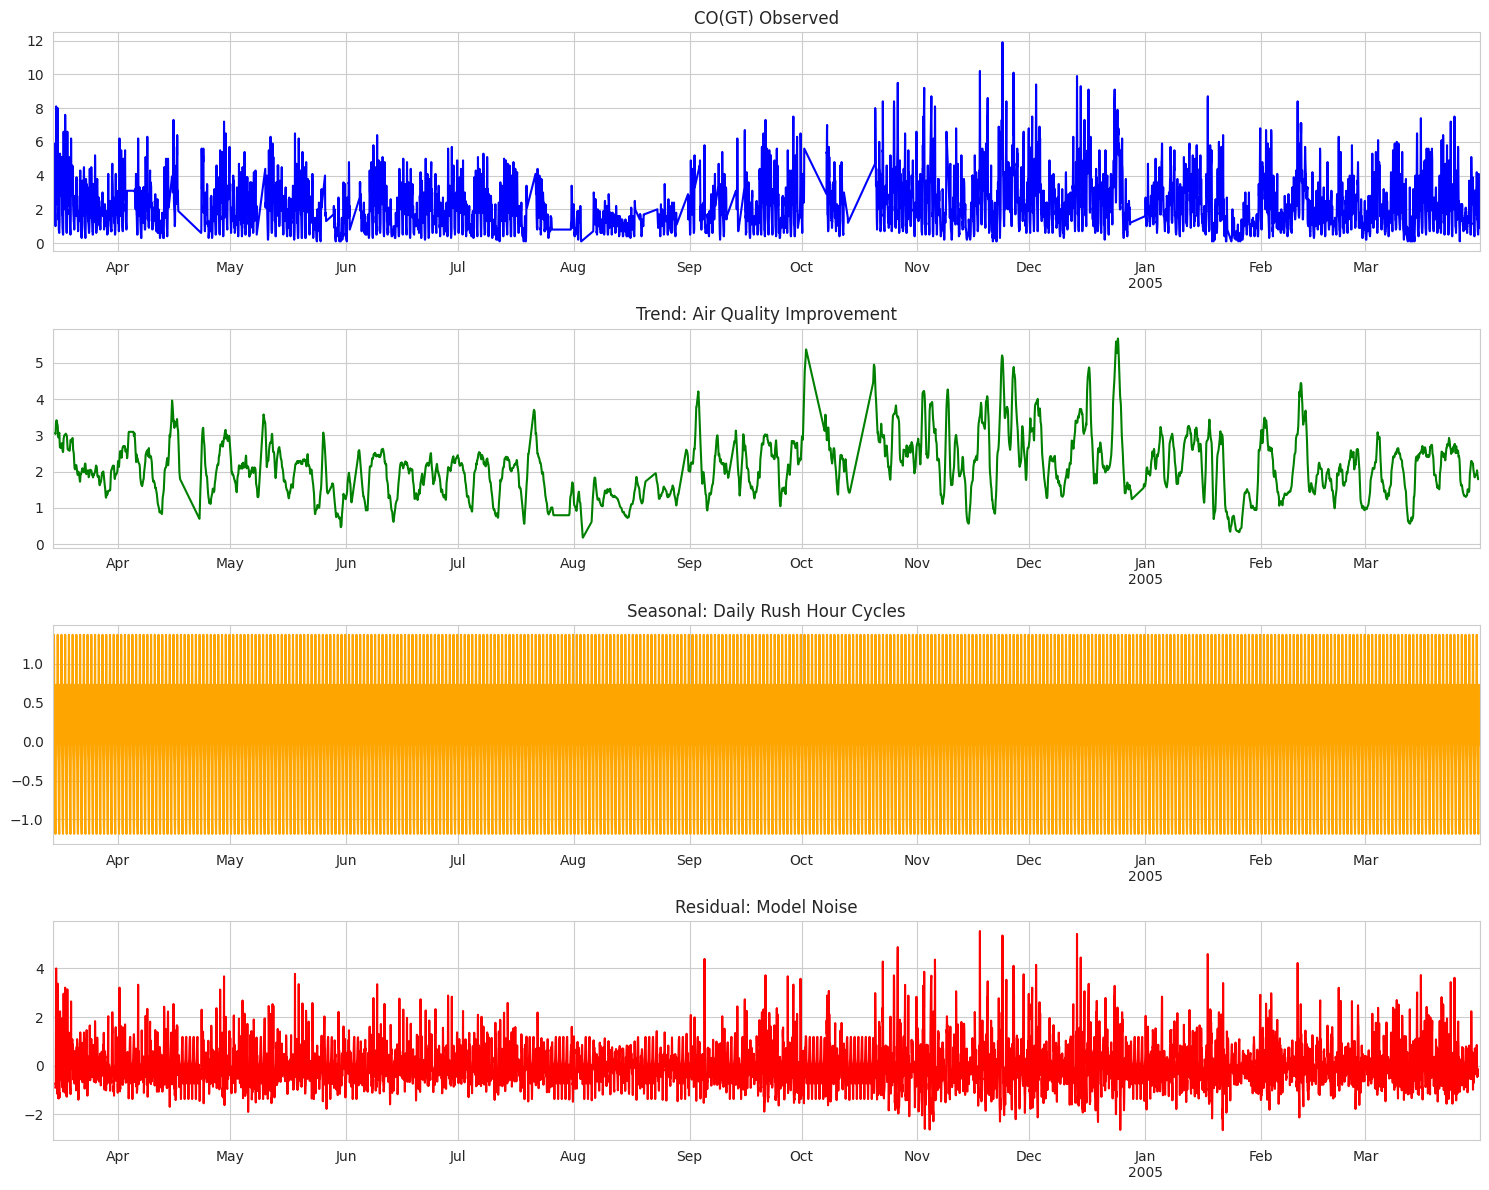

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(15, 12))
decomposition.observed.plot(ax=axes[0], title='CO(GT) Observed', color='blue')
decomposition.trend.plot(ax=axes[1], title='Trend: Air Quality Improvement', color='green')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal: Daily Rush Hour Cycles', color='orange')
decomposition.resid.plot(ax=axes[3], title='Residual: Model Noise', color='red')
plt.tight_layout()
plt.show()

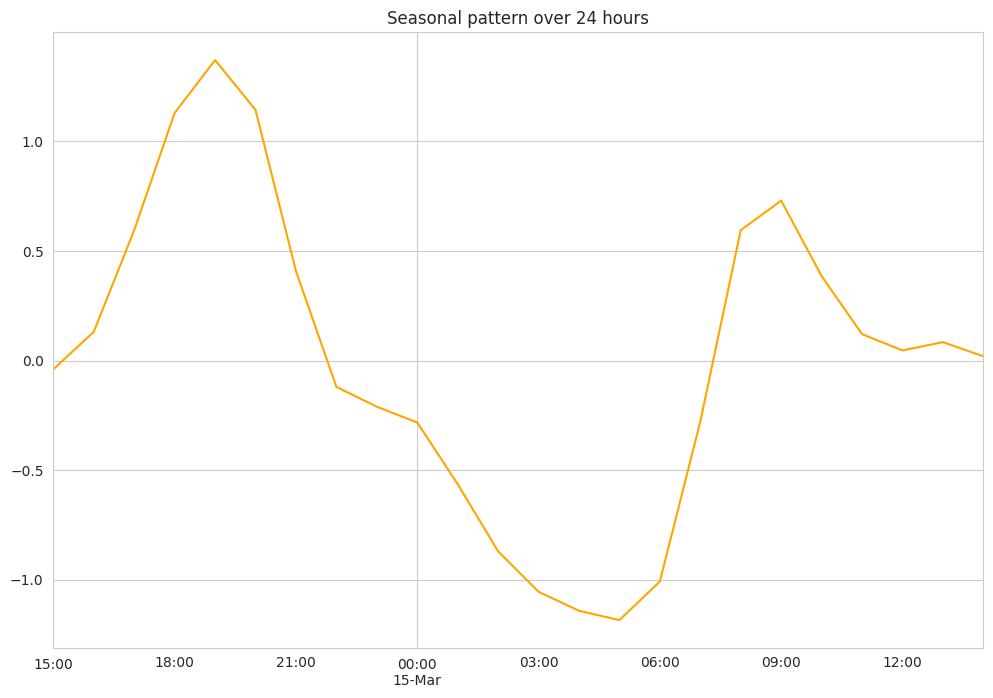

In [ ]:
decomposition.seasonal[:24].plot(color='orange')
plt.title("Seasonal pattern over 24 hours")
plt.show()

In [ ]:
trend_clean = decomposition.trend.dropna()
print(f"Trend: {trend_clean.iloc[0]:.2f} - {trend_clean.iloc[-1]:.2f} mg/m³ (Δ{trend_clean.iloc[-1]-trend_clean.iloc[0]:+.2f})")
print(f"Seasonal: {decomposition.seasonal.max():.2f} - {decomposition.seasonal.min():.2f} (amplitude {decomposition.seasonal.max()-decomposition.seasonal.min():.2f})")
print(f"Residual std: {decomposition.resid.std():.2f}")

Trend: 3.06 - 1.79 mg/m³ (Δ-1.27)
Seasonal: 1.37 - -1.18 (amplitude 2.56)
Residual std: 0.84
